In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn

In [58]:
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [59]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,f1_score,recall_score
from sklearn.metrics import plot_roc_curve

In [5]:
heart_disease=pd.read_csv("heart_disease.csv")

In [6]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
len(heart_disease)

303

In [10]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

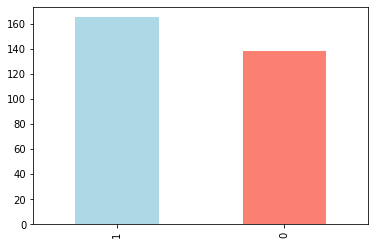

In [18]:
heart_disease['target'].value_counts().plot(kind='bar',color=['lightblue','salmon']);

1 means heart attack 0 means no heart attack

In [19]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


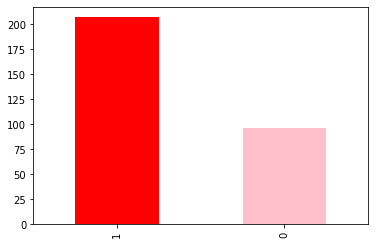

In [22]:
heart_disease['sex'].value_counts().plot(kind='bar',color=['red','pink'])

1 means male 0 means female

In [23]:
pd.crosstab(heart_disease.sex,heart_disease.target)

target,0,1
sex,,
0,24,72
1,114,93


In sex 1 means male 0 means female
In targeT 1 means heart attack 0 means no heart attack


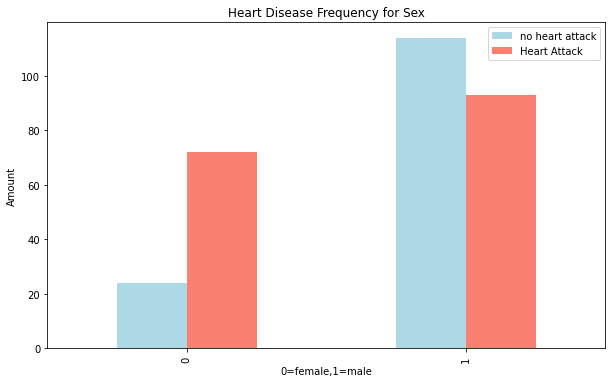

In [28]:
pd.crosstab(heart_disease.sex,heart_disease.target).plot(kind='bar',color=['lightblue','salmon'],figsize=(10,6));
plt.xlabel('0=female,1=male')
plt.ylabel('Amount')
plt.title('Heart Disease Frequency for Sex')
plt.legend(['no heart attack','Heart Attack'])


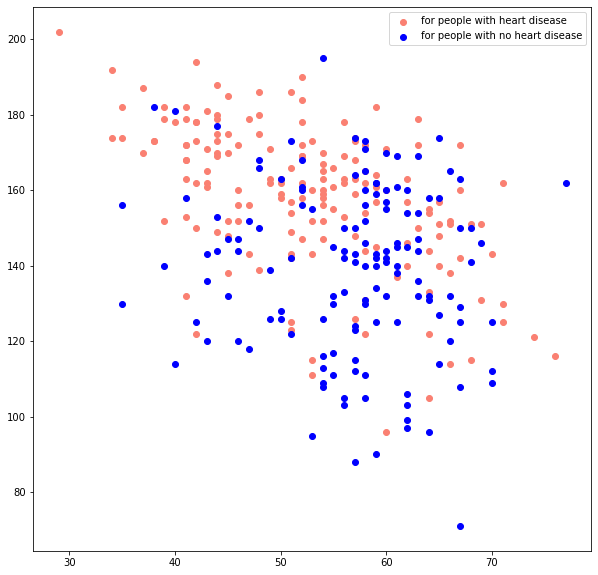

In [37]:
fig, ax=plt.subplots(figsize=(10,10))
ax.scatter(heart_disease.age[heart_disease.target==1],heart_disease.thalach[heart_disease.target==1],c='salmon')
ax.scatter(heart_disease.age[heart_disease.target==0],heart_disease.thalach[heart_disease.target==0],c='blue')
ax.legend(['for people with heart disease','for people with no heart disease']);



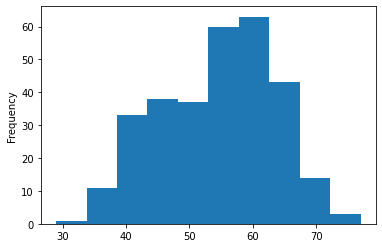

In [40]:
heart_disease.age.plot.hist()

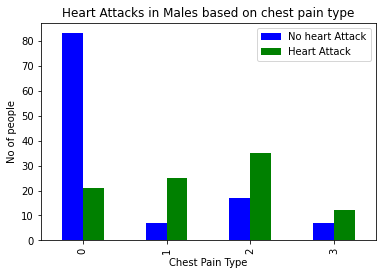

In [47]:
pd.crosstab(heart_disease.cp[heart_disease.sex==1],heart_disease.target[heart_disease.sex==1]).plot(kind='bar',color=['blue','green']);
plt.xlabel('Chest Pain Type')
plt.ylabel("No of people")
plt.legend(['No heart Attack','Heart Attack'])
plt.title('Heart Attacks in Males based on chest pain type');

In [48]:
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


NameError: name 'seaborn' is not defined

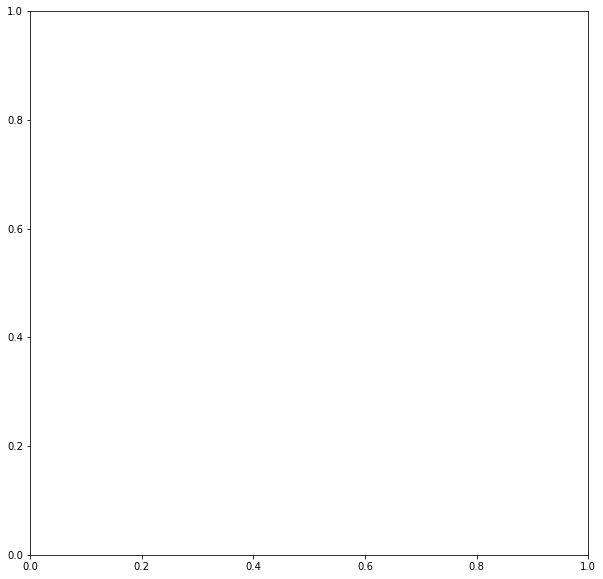

In [51]:
corr_matrix=heart_disease.corr()
fig, ax=plt.subplots(figsize=(10,10))
ax=seaborn.heatmap(corr_matrix,
                  anont=True,
                  linewidth=0.5,
                  fmt='.2f',
                  cmap='YlGnBu')

In [52]:
X=heart_disease.drop('target',axis=1)

In [53]:
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [54]:
Y=heart_disease['target']

In [55]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

Models Dictionary

In [61]:
models={'Logistic Regression': LogisticRegression(),
       'KNN':KNeighborsClassifier(),
       'RandomForest':RandomForestClassifier()}

In [65]:
def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    model_scores={}
    for name,model in models.items():
        model.fit(X_train,Y_train)
        model_scores[name]=model.score(X_test,Y_test)
        
    return model_scores
    

In [66]:
model_scores=fit_and_score(models,X_train,X_test,Y_train,Y_test)

c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
model_scores

{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.5409836065573771,
 'RandomForest': 0.8032786885245902}

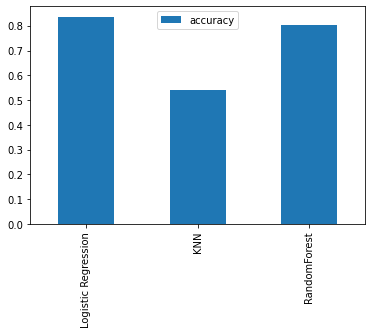

In [71]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar()

In [75]:
model_compare.T

,accuracy
Logistic Regression,0.836066
KNN,0.540984
RandomForest,0.803279


Tuning KNN parameters


In [95]:
train_scores=[]
test_scores=[]
knn=KNeighborsClassifier()
neighbors=range(1,21)
for i in neighbors:
        knn.set_params(n_neighbors=i)
        knn.fit(X_train,Y_train)
        train_scores.append(knn.score(X_train,Y_train))
        test_scores.append(knn.score(X_test,Y_test))
        


MAXSCORE:62.30%


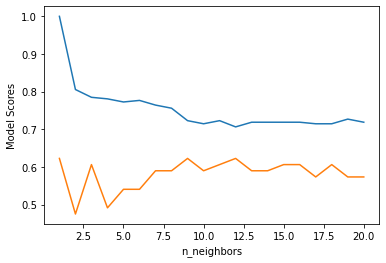

In [103]:
plt.plot(neighbors,train_scores,label='Train_scores');
plt.plot(neighbors,test_scores,label='test_scores');
plt.xlabel('n_neighbors')
plt.ylabel('Model Scores')
print(f'MAXSCORE:{max(test_scores)*100:.2f}%')

Hyperparameter for Logistic Regression and RandomForestClassifier models using RandomisedSearchCV



In [104]:
log_grid={'C':np.logspace(-4,4,20),'solver':['liblinear']}
rf_grid={'n_estimators':np.arange(10,1000,50),
        'max_depth':[None,3,5,10],
        'min_samples_split':np.arange(2,20,2),
        'min_samples_lead':np.arange(1,20,2)}

In [109]:
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_grid,cv=5,n_iter=20,verbose=True)

In [111]:
rs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [112]:
rs_log_reg.score(X_test,Y_test)

0.8852459016393442

Hyperparameter Tuning using Grid Search CV for Logistic Regression model


In [113]:
log_reg_grid={'C':np.logspace(-4,4,30),
             'solver':['liblinear']}
Grid_logreg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)

In [114]:
Grid_logreg.fit(X_train,Y_train)
Grid_logreg.score(X_test,Y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished


0.8688524590163934

In [115]:
Grid_logreg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [116]:
y_preds=Grid_logreg.predict(X_test)

In [117]:
y_preds

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

Plot_ROC_Curve

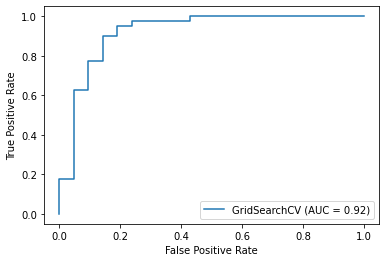

In [118]:
plot_roc_curve(Grid_logreg,X_test,Y_test)

In [119]:
Grid_logreg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [129]:
clf=LogisticRegression(C=0.38566204211634725,solver='liblinear')

In [130]:
cross_val_model1=cross_val_score(clf,X,Y,scoring="accuracy")

In [131]:
cross_val_model1_meanscore=np.mean(cross_val_model1)

In [132]:
cross_val_model1

array([0.81967213, 0.8852459 , 0.86885246, 0.86666667, 0.75      ])

In [133]:
cross_val_model2=cross_val_score(clf,X,Y,scoring="precision")
cross_val_model3=cross_val_score(clf,X,Y,scoring="f1")
cross_val_model4=cross_val_score(clf,X,Y,scoring="recall")

In [134]:
cross_val_model2_meanscore=np.mean(cross_val_model2)
cross_val_model3_meanscore=np.mean(cross_val_model3)
cross_val_model4_meanscore=np.mean(cross_val_model4)

In [136]:

cross_val_model4_meanscore

0.9151515151515153

In [137]:
cross_val_model2_meanscore


0.8154667272314331

In [138]:
cross_val_model3_meanscore

0.8614850462777628

In [146]:
cross_val_score_dict=pd.DataFrame({'Accuracy':cross_val_model1_meanscore,
                     'Precision':cross_val_model2_meanscore,
                     'F1':cross_val_model3_meanscore,
                     'Recall':cross_val_model4_meanscore},index=[0])

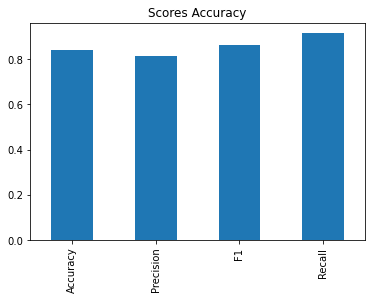

In [149]:
cross_val_score_dict.T.plot.bar(title='Scores Accuracy',legend=False)

In [150]:
Grid_logreg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [152]:
linearmodel=LogisticRegression(C=0.38566204211634725, solver='liblinear')

In [153]:
linearmodel.fit(X_train,Y_train)

LogisticRegression(C=0.38566204211634725, solver='liblinear')

In [154]:
features_dict=dict(zip(heart_disease.columns,list(linearmodel.coef_[0])))

In [155]:
features_dict

{'age': -0.003191485800917478,
 'sex': -0.9265460814925637,
 'cp': 0.7593792348354752,
 'trestbps': -0.01137870583397084,
 'chol': -0.0038615732978280566,
 'fbs': 0.03414011053364732,
 'restecg': 0.5216916794354861,
 'thalach': 0.028385833232775663,
 'exang': -0.6986212481731544,
 'oldpeak': -0.4948459362136564,
 'slope': 0.4036528835657418,
 'ca': -0.5630545639287433,
 'thal': -0.6500858228624398}

In [156]:
features_df=pd.DataFrame(features_dict,index=[0])

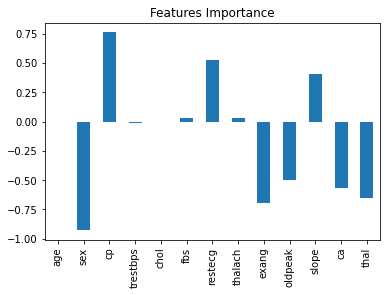

In [158]:
features_df.T.plot.bar(title='Features Importance',legend=False)